## Sign up for Spotify developer account
* Connect developer account to regular spotify account.
* Accept terms.
* Create a non-commercial app

In [1]:
import sys
import spotipy
import spotipy.util as util
import os
from pprint import pprint

with open('config.txt') as f:
    content = f.readlines()
    
os.environ['SPOTIPY_CLIENT_ID'] = content[0].strip()
os.environ['SPOTIPY_CLIENT_SECRET'] = content[1].strip()
os.environ['SPOTIPY_REDIRECT_URI'] = content[2].strip()

username = content[3].strip()
scope = 'user-top-read user-follow-modify' #separated by spaces
token = util.prompt_for_user_token(username, scope)

In [2]:
sp = spotipy.Spotify(auth=token)

Example of Spotify Music Data Analysis
https://github.com/AsTimeGoesBy111/Spotify-Music-Data-Analysis


#### Get playlist as dataframe from ID

In [3]:
import pandas as pd
import datetime

In [4]:
uris = {'37i9dQZF1DX10zKzsJ2jva': 'Viva_Latina',
       '37i9dQZF1DWY7IeIP1cdjF': 'Baila_Reggaeton',
       '37i9dQZF1DXcBWIGoYBM5M': 'Todays_Top_Hits',
       #'37i9dQZF1DX5nwnRMcdReF': 'Top_Tracks_2017',
        '37i9dQZF1DX1HUbZS4LEyL': 'Top_Tracks_2018'}
date = str(datetime.datetime.now())
df = pd.DataFrame(columns=['song_uri', 'playlist', 'song_name', 'popularity'])
for uri, playlist in uris.items():
    response = sp.user_playlist_tracks(username, playlist_id=uri, fields=None, limit=100, offset=0, market=None)
   # pprint(response)
    for i in range(len(response['items'])):
        song_uri = response['items'][i]['track']['uri']
        song_name = response['items'][i]['track']['name']
        popularity = response['items'][i]['track']['popularity']
        explicit = response['items'][i]['track']['explicit']
        duration = response['items'][i]['track']['duration_ms']
        df = df.append({'song_uri': song_uri, 
                        'playlist': playlist, 
                        'song_name': song_name,
                        'popularity': popularity,
                        'explicit': explicit,
                        'duration': duration}, ignore_index=True)

#### Get audio features

In [5]:
response = []
l = len(df['song_uri'])
for a in range(0,l,50):
    b = min(a + 50, l)
    
    song_uris = list(df['song_uri'][a:b])
    response.extend(sp.audio_features(song_uris)) #maximum: 50 ids
df2 = pd.DataFrame(response)

In [6]:
df3 = pd.concat([df, df2], axis=1, sort=False)
df3 = df3.drop(['analysis_url', 'id', 'track_href', 'uri', 'type'], axis=1)

In [7]:
df3.to_csv("Playlist Audio Features_2019.csv", index=False)

In [9]:
df3.head(25)

,song_uri,playlist,song_name,popularity,duration,explicit,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,spotify:track:5iwz1NiezX7WWjnCgY5TH4,Viva_Latina,Calma - Remix,96,238200.0,0.0,0.3230,0.826,238200,0.773,0.000000,11,0.1430,-4.218,0,0.0524,126.899,4,0.761
1,spotify:track:5W83ErFkO3aKAIS1WMi6u0,Viva_Latina,Secreto,89,258800.0,0.0,0.6020,0.807,258800,0.803,0.008530,11,0.1360,-4.156,1,0.1260,91.987,4,0.706
2,spotify:track:0s5DNDV6LAKn2u2Ufa3VjQ,Viva_Latina,Desconocidos,91,204453.0,1.0,0.1460,0.709,204453,0.771,0.000003,7,0.2490,-4.598,1,0.1660,174.006,4,0.709
3,spotify:track:6FyRXC8tJUh863JCkyWqtk,Viva_Latina,Adan y Eva,95,258638.0,0.0,0.3230,0.767,258639,0.709,0.000000,1,0.0676,-4.470,1,0.3360,171.993,4,0.720
4,spotify:track:3ao3OVxHlb3C08vAaApUlm,Viva_Latina,Imposible,90,163880.0,0.0,0.1220,0.786,163880,0.764,0.000000,11,0.1020,-2.935,1,0.0798,90.979,4,0.913
5,spotify:track:6MJUCumnQsQEKbCy28tbCP,Viva_Latina,Adictiva,91,207853.0,0.0,0.2910,0.788,207853,0.771,0.000056,4,0.1720,-3.206,0,0.0563,99.038,4,0.701
6,spotify:track:5YOkA7qd2983FtBQnP8sYx,Viva_Latina,Solo de Mi,87,197967.0,1.0,0.2870,0.743,197968,0.730,0.000081,10,0.0778,-4.314,0,0.1250,179.972,4,0.150
7,spotify:track:059bcIhyc2SBwm6sw2AZzd,Viva_Latina,Te Vi,86,231848.0,0.0,0.0446,0.877,231848,0.777,0.000035,1,0.0863,-4.246,1,0.1170,102.020,4,0.706
8,spotify:track:7uH27oIt4a6cIFCA8ZPcyG,Viva_Latina,Baila Baila Baila,87,158400.0,0.0,0.0361,0.816,158400,0.754,0.000000,11,0.2170,-2.750,0,0.1110,99.966,4,0.533
9,spotify:track:4w8niZpiMy6qz1mntFA5uM,Viva_Latina,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",98,212500.0,1.0,0.1530,0.841,212500,0.798,0.000003,1,0.0618,-4.206,0,0.2290,95.948,4,0.591


Text(0,0.5,'playlist')

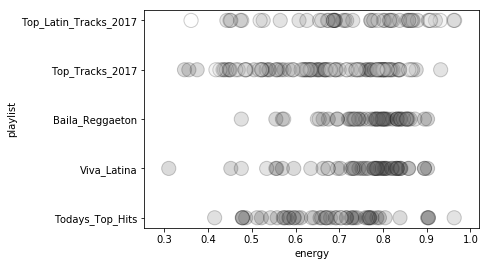

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

x='energy'
y='playlist'
s='popularity' #target = shading
df3 = df3.sort_values(s, ascending=False)

fig, ax = plt.subplots()
plt.gray()
ax.scatter(x=df3[x], y=df3[y], s=200, c=-df3[s]**2, vmin=-10000, vmax=0, edgecolors = 'black', alpha=.2)

plt.xlabel(x)
plt.ylabel(y)


In [ ]:
print(df.columns)

In [ ]:
#https://spotifycharts.com/regional

In [ ]:
#playlists = sp.featured_playlists(locale=None, country='US', timestamp=None, limit=20, offset=0)
#pprint(playlists)

In [ ]:
global_50 = sp.user_playlist_tracks(user='cdefreitas1@bryant.edu',playlist_id='37i9dQZF1DXcBWIGoYBM5M', fields=None, limit=100, offset=0, market=None)

In [ ]:
pprint(global_50)

##
top latin tracks of 2017 https://open.spotify.com/playlist/37i9dQZF1DX1CvQj0vxP1Y
top tracks of 2017 https://open.spotify.com/playlist/37i9dQZF1DX7Axsg3uaDZb

In [ ]:

response = sp.user_playlist_tracks(user='cdefreitas1@bryant.edu',
                                   playlist_id='37i9dQZF1DXcBWIGoYBM5M', 
                                   fields=None, limit=100, offset=0, market=None)
pprint(response)

#### Get search results as dataframe

In [4]:
search_terms = {'year:2018 AND genre:Latin': '2018_Latin',
                'year:2017 AND genre:Latin': '2017_Latin',
                'year:2016 AND genre:Latin': '2016_Latin',
                'year:2015 AND genre:Latin': '2015_Latin',
                'year:2014 AND genre:Latin': '2014_Latin',
                'year:2018 AND genre:Pop': '2018_Pop',
                'year:2017 AND genre:Pop': '2017_Pop',
                'year:2016 AND genre:Pop': '2016_Pop',
                'year:2015 AND genre:Pop': '2015_Pop',
                'year:2014 AND genre:Pop': '2014_Pop',
               }
max_search_length = 10000

In [9]:
date = str(datetime.datetime.now())
length_of_response = max_search_length
df = pd.DataFrame(columns=['song_uri', 'search_term', 'search_title', 'song_name', 'popularity'])
for search_term, search_title in search_terms.items():
    l = max_search_length
    for a in range(0,l,50):
        response = sp.search(q=search_term, limit=50, offset=a, type='track')
        length_of_response = response['tracks']['total']
        #pprint(response)

        for i in range(len(response['tracks']['items'])):
            song_uri = response['tracks']['items'][i]['uri']
            song_name = response['tracks']['items'][i]['name']
            popularity = response['tracks']['items'][i]['popularity']
            explicit = response['tracks']['items'][i]['explicit']
            duration = response['tracks']['items'][i]['duration_ms']
            df = df.append({'song_uri': song_uri,
                            'search_term': search_term,
                            'search_title': search_title,
                            'song_name': song_name,
                            'popularity': popularity,
                            'explicit': explicit,
                            'duration': duration}, ignore_index=True)
        l = min(max_search_length, length_of_response)

In [14]:
response = []
l = len(df['song_uri'])
for a in range(0,l,50):
    b = min(a + 50, l)
    
    song_uris = list(df['song_uri'][a:b])
    response.extend(sp.audio_features(song_uris)) #maximum: 50 ids
df2 = pd.DataFrame(response)

In [15]:
df3 = pd.concat([df, df2], axis=1, sort=False)
df3 = df3.drop(['analysis_url', 'id', 'track_href', 'uri', 'type'], axis=1)

In [16]:
df3.head(5)

,song_uri,search_term,search_title,song_name,popularity,duration,explicit,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,spotify:track:6JjPBQfI2Y8nIjnm65X6Pw,year:2018 AND genre:Latin,2018_Latin,X - Remix,89,235746.0,0.0,0.0561,0.663,235747,0.696,0.000038,9,0.0778,-4.957,0,0.1030,180.113,4,0.738
1,spotify:track:7DrluKkTviBwCc8AV3VGmf,year:2018 AND genre:Latin,2018_Latin,Clandestino,90,231920.0,0.0,0.3900,0.766,231921,0.822,0.000034,1,0.3490,-4.126,0,0.1600,165.842,4,0.881
2,spotify:track:39N9RPD9MRb5WmoLzNzPeA,year:2018 AND genre:Latin,2018_Latin,X,89,173627.0,0.0,0.0364,0.595,173628,0.773,0.001080,9,0.3340,-4.736,0,0.0549,180.073,4,0.711
3,spotify:track:6jA8JUuPCGYjFcgw0AoM5T,year:2018 AND genre:Latin,2018_Latin,Me Niego,89,221653.0,0.0,0.0543,0.777,221653,0.779,0.000000,0,0.6360,-4.449,0,0.0972,94.023,4,0.768
4,spotify:track:6U2NuJILEOEpW2tVCuqKHb,year:2018 AND genre:Latin,2018_Latin,Dura - Remix,87,242160.0,0.0,0.1880,0.772,242160,0.803,0.000000,1,0.4340,-3.035,1,0.0468,94.981,4,0.853


In [17]:
df3.to_csv("Search Audio Features.csv", index=False)

In [ ]:
## NOTE : genre:Latin AND genre:Pop AND year:2018